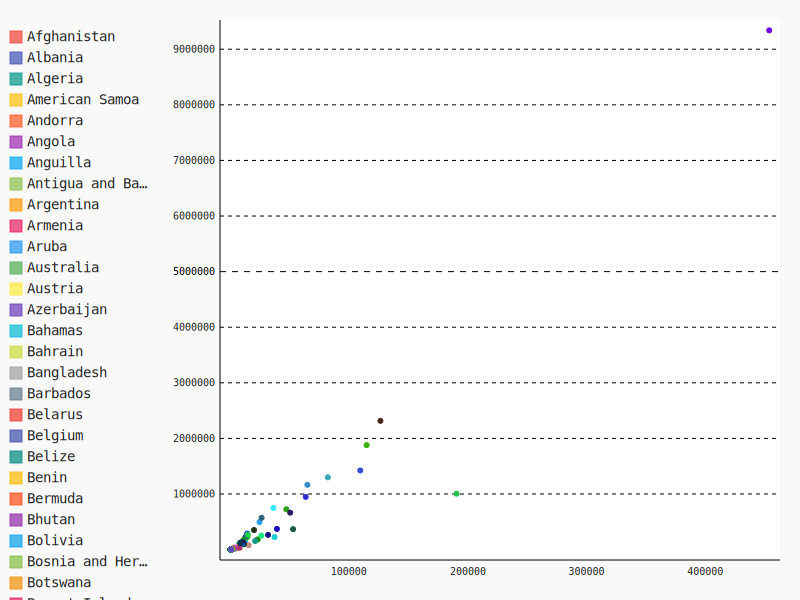

In [15]:
import pandas as pd
import pygal
from IPython.display import SVG, display

# Charger les données à partir du fichier CSV
data = pd.read_csv('publications_scientifiques_par_pays.csv')

# Calculer les moyennes pour chaque variable
means_by_country = data.groupby('Country').mean()

# Calculer le rang médian pour chaque pays
median_rank_by_country = data.groupby('Country')['H.index'].median().sort_values()

# Créer un graphique à bulles avec Pygal
dot_chart = pygal.XY(stroke=False)

# Parcourir chaque pays pour ajouter les points au graphique
for country in means_by_country.index:
    dot_chart.add(country,
                  [{'value': (means_by_country.loc[country, 'Documents'], means_by_country.loc[country, 'Citations']),
                    'label': country,
                    'color': '#{:06x}'.format(int(median_rank_by_country[country] / len(median_rank_by_country) * 255**3)),
                    'xlink': {'href': f'#', 'target': '_top'},
                    'size': means_by_country.loc[country, 'H.index'] / 2}])

# Ajouter les lignes de référence pour les moyennes de chaque variable
dot_chart.add('Moyenne des Documents', [(means_by_country['Documents'].mean(), means_by_country['Citations'].mean())])
dot_chart.add('Moyenne des Citations', [(means_by_country['Documents'].mean(), means_by_country['Citations'].mean())])

# Afficher le graphique dans Jupyter
display(SVG(dot_chart.render(disable_xml_declaration=True)))